# Garbage in, Garbage out

Powerful pretrained vision models can't overcome a bad dataset. Image datasets require elaborate data cleaning process, especially with images that are manually collected and scraped from the web.
I observed two kinds of issues:
1) issues due to the nature of the dataset
2) common issues

Issues due to the nature of the dataset are:
1) partial visibility:
    in some images, the target is partially visible. This is due to the presence of floral/ornamental decoration, human presence, water marks etc.
2) inter-class similarity:
    two or more deities have significant visual similarity. This can confuse the model and make it hard for it to learn.
3) intra-class variance:
    presence of multiple representations of the same deity (representation may include the posture, props, consorts etc)
4) class imbalance:
    some deities have very few image samples.

Common issues are:
1) illumination conditions not same across images
2) images with less information
3) noisy background
4) excessive amount of duplication
5) odd aspect ratio
6) blurry images
7) over or under exposed images

In this notebook we will handle the common issues.

# Weeding out the bad files

First, let us remove the images with incompatible file extensions.

In [1]:
import os
import cv2

from tqdm.auto import tqdm

bad_list = []

for root, dirs, files in os.walk('data\\deities'):
    for filename in tqdm(files):
        filepath = os.path.join(root, filename)
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f'file {filename}  has an invalid extension.')
            bad_list.append(filepath)  
        else:
            try:
                img = cv2.imread(filepath)
                size = img.shape
            except:
                print(f'file {filename} is not a valid image file ')
                bad_list.append(filepath)

c:\Anaconda\envs\nn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
0it [00:00, ?it/s]
100%|██████████| 580/580 [00:30<00:00, 18.81it/s]
0it [00:00, ?it/s]
 72%|███████▏  | 137/190 [00:06<00:02, 20.78it/s]

file cb81d5a82e5f0d31ac6647ac1df4b92c.jpg.url  has an invalid extension.


100%|██████████| 190/190 [00:09<00:00, 19.11it/s]
0it [00:00, ?it/s]
100%|██████████| 361/361 [00:16<00:00, 21.47it/s]


file Vidhya_LAkshmi_large.avif  has an invalid extension.


 98%|█████████▊| 431/440 [00:17<00:00, 26.26it/s]

file 9a71a75642dfa296fa3b1cddc8028414.jpg.url  has an invalid extension.


100%|██████████| 95/95 [00:04<00:00, 23.33it/s]
0it [00:00, ?it/s]
100%|██████████| 99/99 [00:03<00:00, 24.76it/s]
0it [00:00, ?it/s]
100%|██████████| 363/363 [00:22<00:00, 16.13it/s]
0it [00:00, ?it/s]
 32%|███▏      | 28/88 [00:01<00:02, 29.30it/s]

file 22.webp  has an invalid extension.


 93%|█████████▎| 82/88 [00:02<00:00, 32.99it/s]

file DSF5303-4_1024x1024@2x.webp  has an invalid extension.


100%|██████████| 466/466 [00:21<00:00, 21.30it/s]


In [2]:
print(f'Number of bad files: {len(bad_list)}')
print(bad_list)

Number of bad files: 5
['data\\deities\\kaali\\cb81d5a82e5f0d31ac6647ac1df4b92c.jpg.url', 'data\\deities\\lakshmi\\Vidhya_LAkshmi_large.avif', 'data\\deities\\lingam\\9a71a75642dfa296fa3b1cddc8028414.jpg.url', 'data\\deities\\shiva\\shiva-shakti\\22.webp', 'data\\deities\\shiva\\shiva-shakti\\DSF5303-4_1024x1024@2x.webp']


Images with .avif and .webp file extensions were handled using online tools.

# Renaming the files

Before cleaning the data, let us rename the image files properly with a coherent naming convention. We will rename each image file with a random string of letters and digits.

In [10]:
import string
import random

def random_string(length):
    # generates a random alphanumeric string of given length.
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choice(letters_and_digits) for i in range(length))

for root, dirs, files in os.walk('data\\deities'):
    for filename in tqdm(files):
        random_string_value = random_string(8)
        new_filename = random_string_value + os.path.splitext(filename)[1]
        original_file_path = os.path.join(root, filename)
        new_file_path = os.path.join(root, new_filename)
        os.rename(original_file_path, new_file_path)

0it [00:00, ?it/s]
100%|██████████| 466/466 [00:02<00:00, 180.46it/s]


## Converting all images to RGB format

The data cleaning tool that we will be using expects images to be in RGB format.

In [5]:
import numpy as np
from PIL import Image

for deity in os.listdir('data\\deities'):
    for img_name in tqdm(os.listdir(f'data\\deities\\{deity}')):
        img_path = os.path.join(f'data\\deities\\{deity}\\{img_name}')
        img = Image.open(img_path)
        try:
            imgarr = np.asarray(img)
            imgarr[:, :, 2].astype("int")
        except:
            print(imgarr.shape)
            print(img_path)
            img = img.convert('RGB')
            img.save(img_path)

 55%|█████▍    | 149/272 [00:03<00:02, 53.08it/s]c:\Anaconda\envs\nn\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(500, 400)
data\deities\sai-baba\lGfaxYiz.png


 86%|████████▌ | 311/363 [00:05<00:00, 64.72it/s]

(1080, 1080)
data\deities\saraswati\uOTCZGLf.jpg


  8%|▊         | 39/466 [00:00<00:06, 64.89it/s]

(757, 411)
data\deities\vishnu\5JlzWpVO.jpg


100%|██████████| 466/466 [00:08<00:00, 57.64it/s]


# Cleaning the data

We will use the [CleanVision](https://github.com/cleanlab/cleanvision) library to clean the data. The library is built to automatically detects various issues in image datasets, such as images that are: (near) duplicates, blurry, over/under-exposed, etc.

In [9]:
from cleanvision.imagelab import Imagelab

filepaths = []
for  dirpath, dirnames, filenames in os.walk('data\\deities'):
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        filepaths.append(filepath)

# imagelab = Imagelab(filepaths=filepaths)
# imagelab.find_issues()
print(len(filepaths))

7891


Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████| 7891/7891 [01:27<00:00, 89.76it/s] 


Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           10 |
|  1 | odd_aspect_ratio |            8 |
|  2 | exact_duplicates |            4 |
|  3 | dark             |            1 |
|  4 | low_information  |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


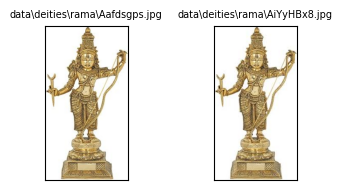

Set: 1


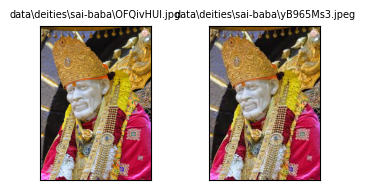

Set: 2


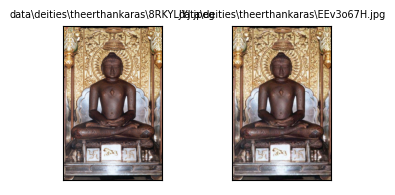

Set: 3


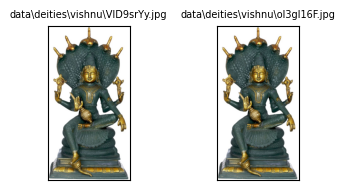


Top 4 examples with odd_aspect_ratio issue in the dataset.


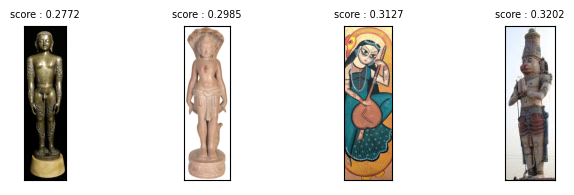

Found 2 sets of images with exact_duplicates issue in the dataset.
Set: 0


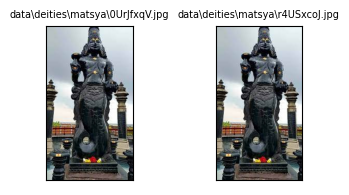

Set: 1


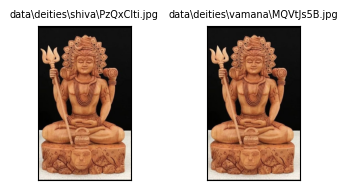

Found 1 example with dark issue in the dataset.


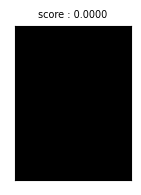

Found 1 example with low_information issue in the dataset.


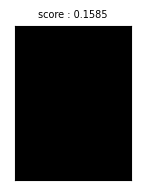

In [10]:
imagelab = Imagelab(filepaths=filepaths)
imagelab.find_issues()
imagelab.report()

In [12]:
imagelab.issue_summary

,issue_type,num_images
0,near_duplicates,10
1,odd_aspect_ratio,8
2,exact_duplicates,4
3,dark,1
4,low_information,1
5,blurry,0
6,grayscale,0
7,light,0


In [28]:
issues = imagelab.issue_summary["issue_type"].tolist()
bad_imgs = []

for issue in issues:
    if issue in ["near_duplicates", "exact_duplicates"]:
        sets = imagelab.info[issue]['sets']
        for set in sets:
            bad_imgs.append(set[0])
    else:
        issue_key = f"is_{issue}_issue"
        score_key = f"{issue}_score"
        bad_imgs = bad_imgs + imagelab.issues[imagelab.issues[issue_key] == True].sort_values(by=[score_key]).index.tolist()

print(len(bad_imgs))
print(bad_imgs)

17
['data\\deities\\rama\\Aafdsgps.jpg', 'data\\deities\\sai-baba\\OFQivHUI.jpg', 'data\\deities\\theerthankaras\\8RKYLJYJ.jpeg', 'data\\deities\\vishnu\\VID9srYy.jpg', 'data\\deities\\vishnu\\fOoPHX8m.jpg', 'data\\deities\\theerthankaras\\9wTrJ5ZJ.jpg', 'data\\deities\\theerthankaras\\l42LZQhO.jpg', 'data\\deities\\saraswati\\H8jAp7sc.jpg', 'data\\deities\\hanuman\\vjt89jFj.jpg', 'data\\deities\\kurma\\I7xjaS7l.jpg', 'data\\deities\\hanuman\\mXcZAnM8.jpg', 'data\\deities\\hanuman\\hGhVUIcR.jpg', 'data\\deities\\hanuman\\HFxTJKax.jpeg', 'data\\deities\\matsya\\0UrJfxqV.jpg', 'data\\deities\\shiva\\PzQxClti.jpg', 'data\\deities\\rama\\Qawjz8DY.jpg', 'data\\deities\\rama\\Qawjz8DY.jpg']


In [33]:
for img in bad_imgs:
    os.remove(img)

## Push data to Kaggle

We will push new version of the data everytime we add new pictures or new classes. In future we need to automate the workflow..

In [40]:
os. chdir(r"C:\Users\Yegyanathan V\Desktop\Python\Ideitify\data")

! kaggle datasets version -m "Added new data and created new classes." --dir-mode "zip"

Starting upload for file deities.zip
Upload successful: deities.zip (923MB)
Dataset version is being created. Please check progress at https://www.kaggle.com/vyegyanathan/ideitify



  0%|          | 0.00/923M [00:00<?, ?B/s]
  0%|          | 8.00k/923M [00:00<6:25:18, 41.9kB/s]
  0%|          | 120k/923M [00:00<33:59, 474kB/s]    
  0%|          | 1.01M/923M [00:00<04:24, 3.66MB/s]
  0%|          | 2.23M/923M [00:01<13:05, 1.23MB/s]
  1%|          | 4.73M/923M [00:01<04:56, 3.24MB/s]
  1%|          | 8.29M/923M [00:02<02:21, 6.76MB/s]
  1%|▏         | 11.6M/923M [00:02<01:32, 10.4MB/s]
  2%|▏         | 14.7M/923M [00:02<01:08, 13.8MB/s]
  2%|▏         | 17.5M/923M [00:02<00:57, 16.5MB/s]
  2%|▏         | 20.8M/923M [00:02<00:46, 20.3MB/s]
  3%|▎         | 25.4M/923M [00:02<00:36, 26.0MB/s]
  3%|▎         | 29.5M/923M [00:02<00:31, 29.9MB/s]
  4%|▎         | 32.9M/923M [00:02<00:36, 25.5MB/s]
  4%|▍         | 35.9M/923M [00:02<00:38, 24.4MB/s]
  4%|▍         | 38.6M/923M [00:04<03:12, 4.82MB/s]
  4%|▍         | 40.8M/923M [00:05<02:38, 5.84MB/s]
  5%|▍         | 43.0M/923M [00:05<02:09, 7.10MB/s]
  5%|▍         | 45.1M/923M [00:05<01:46, 8.62MB/s]
  5%|▌         |